In [3]:
import pandas as pd
try:
    df = pd.read_excel('alcohol-consumption.csv')
except:
    import xlwings as xw
    df = xw.Book('alcohol-consumption.csv')
    df = df.sheets(1).used_range.options(pd.DataFrame, index = False).value


In [104]:
import missingno as msno
import plotly.express as px
import numpy as np
import seaborn as sns

In [4]:
df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 189 non-null    object 
 1   total_consumption       189 non-null    float64
 2   recorded_consumption    189 non-null    float64
 3   unrecorded_consumption  189 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         189 non-null    float64
 9   2025_projection         189 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.9+ KB


In [7]:
df.describe()

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
count,189.000000,189.000000,189.000000,179.000000,179.000000,179.000000,179.000000,189.000000,189.000000
mean,6.183598,4.923280,1.379894,43.484358,16.306704,29.394413,10.807821,6.252910,6.451852
std,4.124949,3.774605,0.891459,22.147305,18.123067,24.027063,23.013580,4.101291,4.178982
min,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.400000,1.400000,0.800000,28.300000,2.150000,10.850000,0.000000,2.500000,2.700000
50%,6.300000,4.500000,1.300000,39.900000,8.500000,25.400000,0.700000,6.300000,6.600000
75%,9.400000,7.900000,1.800000,56.900000,27.950000,43.750000,4.650000,9.700000,10.200000
max,16.900000,15.800000,5.300000,100.000000,84.700000,97.300000,94.900000,16.200000,18.300000


In [5]:
df.isnull().sum()

country                    0
total_consumption          0
recorded_consumption       0
unrecorded_consumption     0
beer_percentage           10
wine_percentage           10
spirits_percentage        10
other_percentage          10
2020_projection            0
2025_projection            0
dtype: int64

<AxesSubplot:>

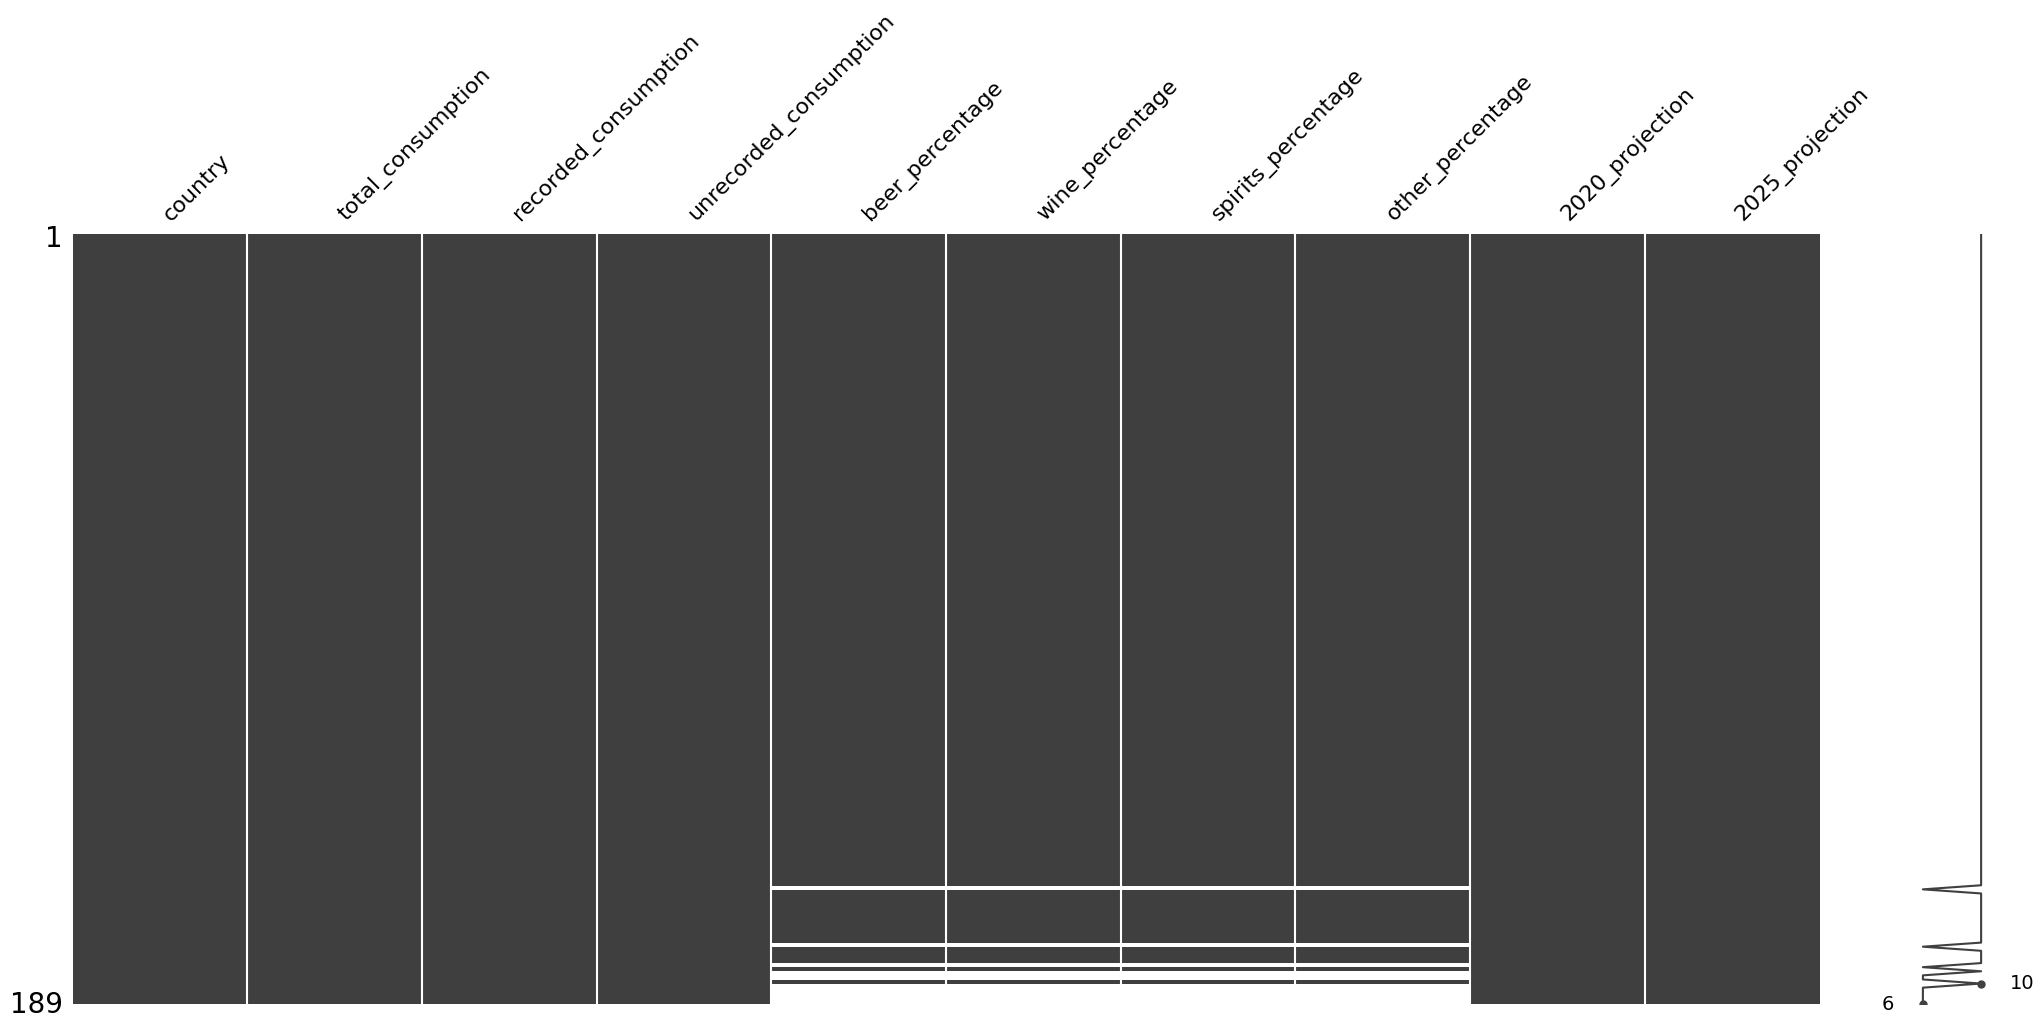

In [9]:
# 결측치 시각화
msno.matrix(df)

In [10]:
#결측치 채우기
df.fillna(0, inplace=True)
df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,Kuwait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,Libya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,Mauritania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 주종별 소비량 구하기(소수점 2까지(L))
for i in range(df.shape[0]):
    df.loc[i, "beer_consumption"] = round(df['total_consumption'][i] * df['beer_percentage'][i] * 0.01, 2)
    df.loc[i, "wine_consumption"] = round(df['total_consumption'][i] * df['wine_percentage'][i] * 0.01, 2)
    df.loc[i, "spirits_consumption"] = round(df['total_consumption'][i] * df['spirits_percentage'][i] * 0.01, 2)
    df.loc[i, "other_consumption"] = round(df['total_consumption'][i] * df['other_percentage'][i] * 0.01, 2)    

In [13]:
df

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection,beer_consumption,wine_consumption,spirits_consumption,other_consumption
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9,5.53,1.25,8.50,1.62
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9,6.54,1.10,5.56,1.82
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4,7.62,3.05,3.63,0.00
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6,9.51,3.09,0.87,0.34
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6,7.05,3.81,2.53,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
185,Kuwait,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
186,Libya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
187,Mauritania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [150]:
px.bar(df.head(10), x='country', y='total_consumption', text='total_consumption', title="상위 10개의 주류 소비량 국가(단위 : L)", color='total_consumption', 
color_continuous_scale='rainbow')

In [88]:
px.bar(df.head(10).sort_values('total_consumption', ascending=True), x='total_consumption', y='country', text='total_consumption', title="상위 10개의 주류 소비량 국가(단위 : L)", color='total_consumption',
 color_continuous_scale='rainbow',pattern_shape_sequence=['x'])

In [19]:
px.line(df.head(10), x='country', y='total_consumption', text='total_consumption', title="상위 10개의 주류 소비량 국가(단위 : L)")

In [92]:
px.bar(df.sort_values('beer_consumption',ascending=False).head(20), x='country', y='beer_consumption', title="맥주류 소비량 top20(단위 : L)",   text='beer_consumption',color='country', color_continuous_scale='matter')

In [96]:
px.bar(df.sort_values('beer_consumption',ascending=False).head(10), x='beer_consumption', y='country', title="맥주류 소비량 top10(단위 : L)",   text='beer_consumption',color='country', color_continuous_scale='matter')

In [93]:
px.bar(df.sort_values('wine_consumption',ascending=False).head(20), x='country', y='wine_consumption', title="와인류 소비량 top20(단위 : L)",  text='wine_consumption',color='country', color_continuous_scale='matter')

In [103]:
px.bar(df.sort_values('wine_consumption',ascending=False).head(10), x='wine_consumption', y='country', title="와인류 소비량 top10(단위 : L)",  text='wine_consumption',color='country', color_continuous_scale='matter')

In [94]:
px.bar(df.sort_values('spirits_consumption',ascending=False).head(20), x='country', y='spirits_consumption', title=" 증류류 소비량 top20(단위 : L)", text='spirits_consumption',color='country', color_continuous_scale='matter')

In [102]:
px.bar(df.sort_values('spirits_consumption',ascending=False).head(10), x='spirits_consumption', y='country', title=" 증류류 소비량 top10(단위 : L)", text='spirits_consumption',color='country', color_continuous_scale='matter')

In [91]:
px.bar(df.sort_values('other_consumption',ascending=False).head(20), x='country', y='other_consumption', title="다른 주류 소비량 top20(단위 : L)", text='other_consumption',color='country', color_continuous_scale='matter')

In [101]:
px.bar(df.sort_values('other_consumption',ascending=False).head(10), x='other_consumption', y='country', title="다른 주류 소비량 top10(단위 : L)", text='other_consumption',color='country', color_continuous_scale='matter')

In [ ]:
# 맥주 소비량 연관 산점도

In [106]:
px.scatter(df.sort_values('beer_consumption',ascending=False).head(20), x='beer_consumption', y='beer_percentage', title="beer 소비량 top20", color='country', color_continuous_scale='matter')

In [107]:
px.scatter(df.sort_values('wine_consumption',ascending=False).head(20), x='wine_consumption', y='wine_percentage', title="wine 소비량 top20", color='country', color_continuous_scale='matter')

In [108]:
px.scatter(df.sort_values('spirits_consumption',ascending=False).head(20), x='spirits_consumption', y='spirits_percentage', title="spirits 소비량 top20", color='country', color_continuous_scale='matter')

In [109]:
px.scatter(df.sort_values('other_consumption',ascending=False).head(20), x='other_consumption', y='other_percentage', title="other 소비량 top20", color='country', color_continuous_scale='matter')

In [147]:
Korea = df[df['country'] == 'South Korea']
x=['beer_consumption','wine_consumption','spirits_consumption','other_consumption']
y =[float(Korea['beer_consumption']), float(Korea['wine_consumption']), float(Korea['spirits_consumption']), float(Korea['other_consumption'])]

In [145]:
px.bar(x=x, y =y, text=y, color=x, title= "한국 1인당 주종 별 소비량(단위 : L)")